In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import pandas as pd
import numpy as np

In [13]:
from sklearn.ensemble import RandomForestRegressor
## visualize one of the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [4]:
full_model_selection = pd.read_excel("full_model_selection.xlsx", sheet_name="encode")
full_model_selection.tail()

,ID,name,alg,XGBoost,Random_Forest,Ridge_Regression,Lasso,PCA,Auto_Encoder,Stepwise,...,random_search_tuning,grid_search_tuning,RMSE_training,RMSE_validation,L2,learning_rate,n_estimators,max_depth,n_components,features
56,57,rf_meta_lasso1,Lasso+RF,0,1,0,1,0,0,0,...,0,0,0.101356,0.250827,0.00,NaN,10.0,NaN,NaN,claderich0.25'
57,58,ridge_taxa_lasso1,Lasso+Ridge Regression,0,0,1,1,0,0,0,...,0,0,0.067086,0.333340,2.00,NaN,NaN,NaN,NaN,"X.8e6421538a6d7567793fc98b1ab81136',\n '..."
58,59,ridge_taxa_lasso_grid_est,Lasso+Ridge Regression,0,0,1,1,0,0,0,...,0,0,0.067395,0.332760,2.25,NaN,NaN,NaN,NaN,"X.8e6421538a6d7567793fc98b1ab81136',\n '..."
59,60,xgb_taxa_lasso1,Lasso+XGBoost,1,0,0,1,0,0,0,...,0,0,0.122501,0.325406,1.00,0.02,60.0,5.0,NaN,"X.8e6421538a6d7567793fc98b1ab81136',\n '..."
60,61,rf_taxa_lasso1,Lasso+RF,0,1,0,1,0,0,0,...,0,0,0.058294,0.345141,0.00,NaN,10.0,NaN,NaN,"X.8e6421538a6d7567793fc98b1ab81136',\n '..."


In [20]:
tree = DecisionTreeRegressor()
X_model = full_model_selection.drop(['RMSE_training', 'RMSE_validation'], axis=1)
X_model_clean = X_model.drop(['ID', 'name', 'alg', 'features'], axis=1)
y_training = full_model_selection.RMSE_training
y_validation = full_model_selection.RMSE_validation

In [21]:
X_model_clean = X_model_clean.fillna(-1)
X_model_clean.isnull().sum()

XGBoost                 0
Random_Forest           0
Ridge_Regression        0
Lasso                   0
PCA                     0
Auto_Encoder            0
Stepwise                0
normalization (x)       0
transformation(y)       0
dim_reduction           0
meta                    0
taxa                    0
meta_partial            0
taxa_partial            0
random_search_tuning    0
grid_search_tuning      0
L2                      0
learning_rate           0
n_estimators            0
max_depth               0
n_components            0
dtype: int64

In [23]:
y_comb = pd.concat([X_model.ID, y_training, y_validation], axis=1)
y_comb.head()

,ID,RMSE_training,RMSE_validation
0,1,0.162460,0.286727
1,2,0.162460,0.286727
2,3,0.114477,0.284682
3,4,0.144501,0.278241
4,5,0.170213,0.281397


In [24]:
tree.fit(X_model_clean, y_comb)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

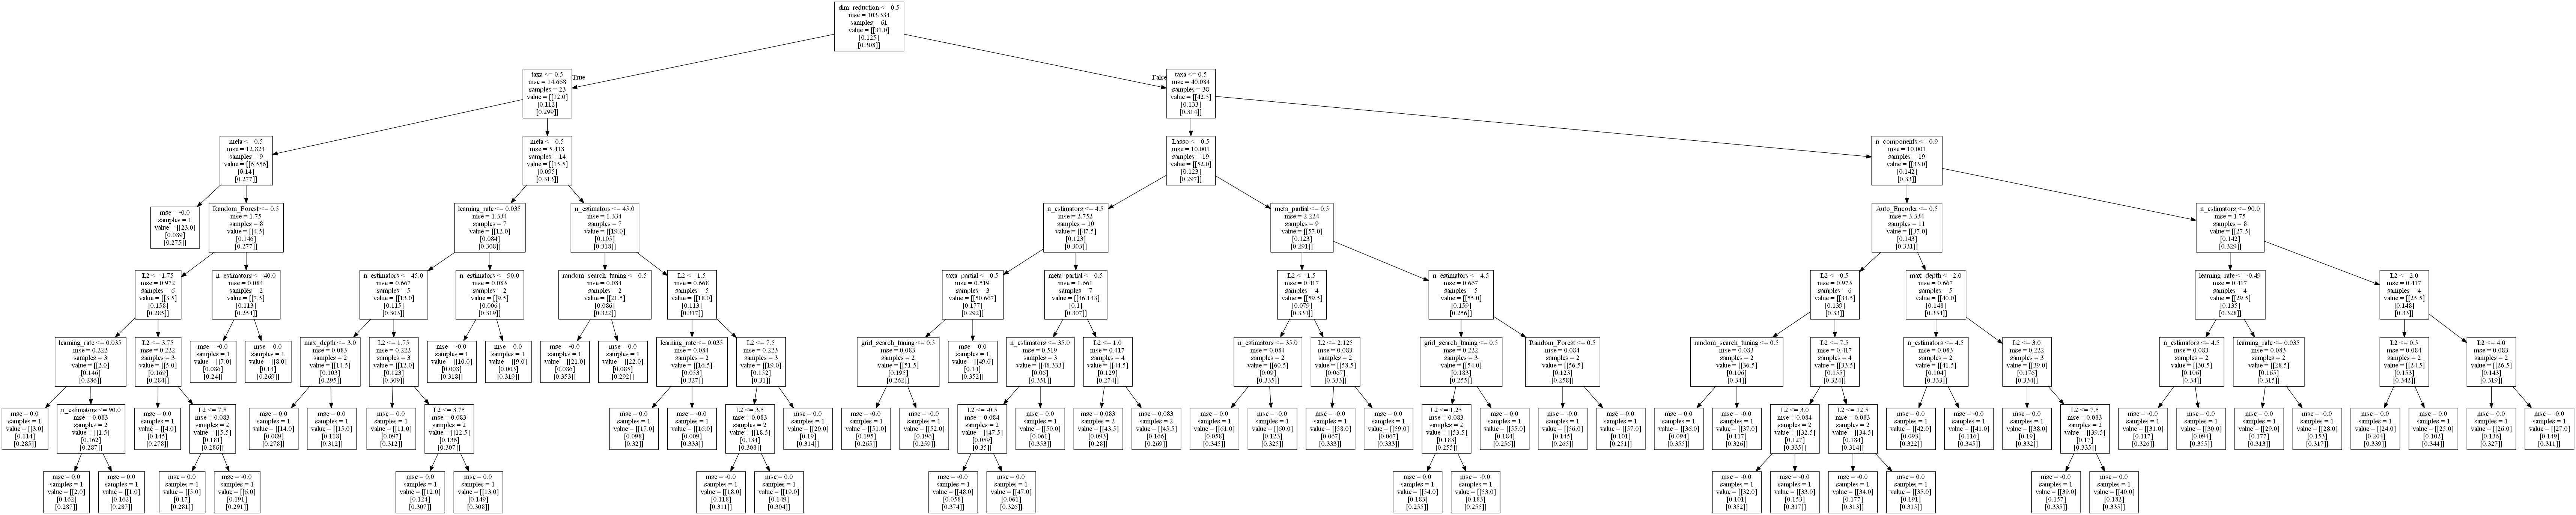

In [28]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X_model_clean.columns, leaves_parallel=False, node_ids=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())